In [61]:
import time
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS
from netCDF4 import num2date
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/Best')
best_gfs.datasets
best_ds = list(best_gfs.datasets.values())[0]
best_ds.access_urls
ncss = NCSS(best_ds.access_urls['NetcdfSubset'])
queryUV = ncss.query()
now = datetime.utcnow()
queryUV.lonlat_box(0,359.5, 90, 90).vertical_level(250000).time_range(now, now + timedelta(days=9.75))
queryUV.variables('u-component_of_wind_isobaric', 'v-component_of_wind_isobaric').accept('netcdf')
dataUV = ncss.get_data(queryUV)
keysUV = list(dataUV.variables.keys())
latUV = dataUV.variables['lat']
lonUV = dataUV.variables['lon']
timeUV = dataUV.variables['time']
uwnd = dataUV.variables['u-component_of_wind_isobaric']
vwnd = dataUV.variables['v-component_of_wind_isobaric']
timeUV_vals = num2date(timeUV[:].squeeze(), timeUV.units)
framesUV = len(timeUV_vals)
queryO3 = ncss.query()
queryO3.lonlat_box(0,359.5, 90, 90).vertical_level(3000).time_range(now - timedelta(days=13.25), now + timedelta(days=9.75))
queryO3.variables('Geopotential_height_isobaric').accept('netcdf')
dataO3 = ncss.get_data(queryO3)
keysO3 = list(dataO3.variables.keys())
latO3 = dataO3.variables['lat']
lonO3 = dataO3.variables['lon']
timeO3 = dataO3.variables['time']
ozone = dataO3.variables['Geopotential_height_isobaric']
timeO3_vals = num2date(timeO3[:].squeeze(), timeO3.units)
framesO3 = len(timeO3_vals)
# keysUV,keysO3,framesUV,framesO3,timeUV_vals[:framesUV],timeO3_vals[:framesO3]

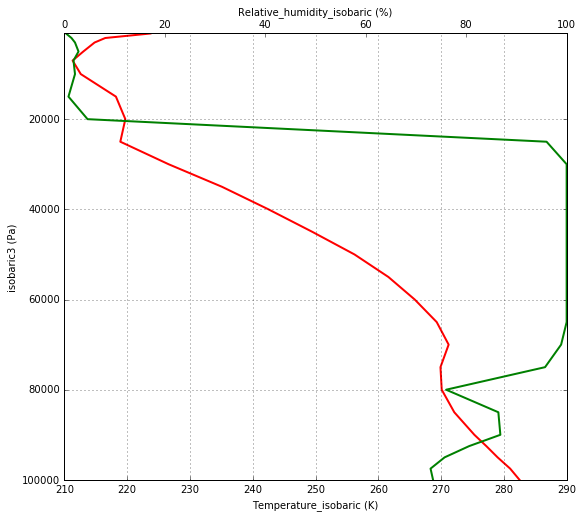

In [11]:
localy=float(33.778474)  #GA Tech
localx=float(-84.398881) #crawled.exhales.softest
#y=float(42.359247) #MI Tech
#x=float(-71.09313) #purely.casual.text
sonde = ncss.query()
sonde.lonlat_point(localx, localy).time(datetime.utcnow())
sonde.accept('netcdf4')
sonde.variables('Temperature_isobaric', 'Relative_humidity_isobaric')
sounding = ncss.get_data(sonde)
keysSound = list(sounding.variables.keys())
tempSound = sounding.variables['Temperature_isobaric']
relhSound = sounding.variables['Relative_humidity_isobaric']
pressSound = sounding.variables['isobaric3']
pressSound_vals = pressSound[:].squeeze()

fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.plot(tempSound[:].squeeze(), pressSound_vals, 'r', linewidth=2)
ax.set_xlabel(tempSound.standard_name + ' (%s)' % tempSound.units)
ax.set_ylabel(pressSound.standard_name + ' (%s)' % pressSound.units)

# Create second plot with shared y-axis
ax2 = plt.twiny(ax)
ax2.plot(relhSound[:].squeeze(), pressSound_vals, 'g', linewidth=2)
ax2.set_xlabel(relhSound.standard_name + ' (%s)' % relhSound.units)
ax.set_ylim(pressSound_vals.max(), pressSound_vals.min())
ax.grid(True)

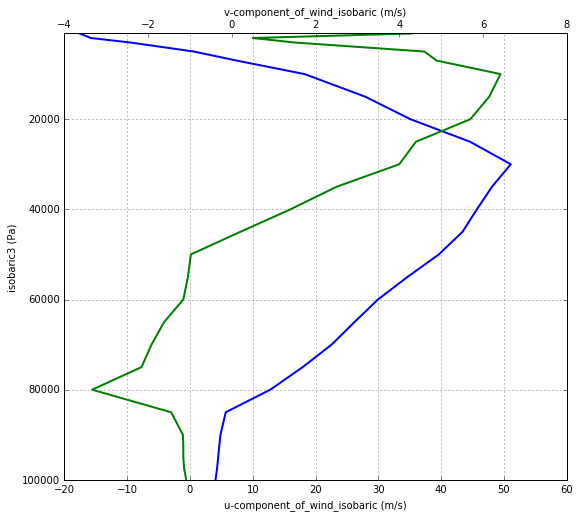

In [12]:
sonde2 = ncss.query()
sonde2.lonlat_point(-71, 42).time(datetime.utcnow())
sonde2.accept('netcdf4')
sonde2.variables('u-component_of_wind_isobaric', 'v-component_of_wind_isobaric')
sounding2 = ncss.get_data(sonde2)
keysSound2 = list(sounding2.variables.keys())
uwndSound = sounding2.variables['u-component_of_wind_isobaric']
vwndSound = sounding2.variables['v-component_of_wind_isobaric']
pressSound2 = sounding2.variables['isobaric3']
pressSound2_vals = pressSound2[:].squeeze()

figs, ax3 = plt.subplots(1, 1, figsize=(9, 8))
ax3.plot(uwndSound[:].squeeze(), pressSound_vals, 'b', linewidth=2)
ax3.set_xlabel(uwndSound.standard_name + ' (%s)' % uwndSound.units)
ax3.set_ylabel(pressSound2.standard_name + ' (%s)' % pressSound2.units)

# Create second plot with shared y-axis
ax4 = plt.twiny(ax3)
ax4.plot(vwndSound[:].squeeze(), pressSound2_vals, 'g', linewidth=2)
ax4.set_xlabel(vwndSound.standard_name + ' (%s)' % vwndSound.units)
ax3.set_ylim(pressSound2_vals.max(), pressSound2_vals.min())
ax3.grid(True)

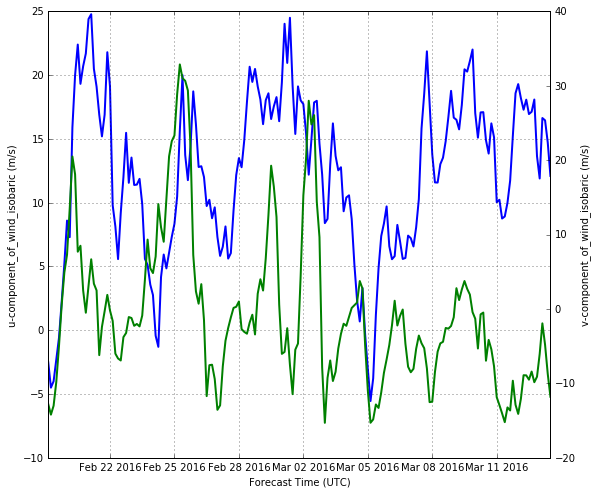

In [59]:
fore = ncss.query()
now = datetime.utcnow()
fore.lonlat_point(-71, 42).vertical_level(100000).time_range(now - timedelta(days=13.75), now + timedelta(days=9.75))
fore.variables('u-component_of_wind_isobaric','v-component_of_wind_isobaric').accept('netcdf')
cast = ncss.get_data(fore)
keysCast = list(cast.variables.keys())

uCast = cast.variables['u-component_of_wind_isobaric']
vCast = cast.variables['v-component_of_wind_isobaric']
timeCast = cast.variables['time']
timeCast_vals = num2date(timeCast[:].squeeze(), timeCast.units)
framesU = len(timeCast_vals)

figure, ax0 = plt.subplots(1, 1, figsize=(9, 8))
ax0.plot(timeCast_vals, uCast[:].squeeze(), 'b', linewidth=2)
ax0.set_ylabel(uCast.standard_name + ' (%s)' % uCast.units)
ax0.set_xlabel('Forecast Time (UTC)')

# Create second plot with shared y-axis
ax1 = plt.twinx(ax0)
ax1.plot(timeCast_vals, vCast[:].squeeze(), 'g', linewidth=2)
ax1.set_ylabel(vCast.standard_name + ' (%s)' % vCast.units)
ax1.legend(loc=0)
ax0.grid(True)



In [76]:
start = 0
end = 100000
step = end/10
end = end+step

altitudes = np.arange(start,end,step)

df = pd.DataFrame()

for a in altitudes:
    fore = ncss.query()
    fore.lonlat_point(-71, 42).vertical_level(100000).time_range(now - timedelta(days=13.75), now + timedelta(days=9.75))
    fore.variables('u-component_of_wind_isobaric','v-component_of_wind_isobaric').accept('netcdf')
    cast = ncss.get_data(fore)
    keysCast = list(cast.variables.keys())
    uCast = cast.variables['u-component_of_wind_isobaric']
    vCast = cast.variables['v-component_of_wind_isobaric']
    timeCast = cast.variables['time']
    timeCast_vals = num2date(timeCast[:].squeeze(), timeCast.units)
    df['time'] = timeCast_vals
    df['u'+`a`] = uCast[:].squeeze()
    df['u'+`a`] = vCast[:].squeeze()
    time.sleep(.5)
df.to_csv('../data.csv')
    

,time,u0,u10000,u20000,u30000,u40000,u50000,u60000,u70000,u80000,u90000
0,2016-02-19 03:00:00,-8.55,-8.55,-8.55,-8.55,-8.55,-8.55,-8.55,-8.55,-8.55,-8.55
1,2016-02-19 06:00:00,-7.64,-7.64,-7.64,-7.64,-7.64,-7.64,-7.64,-7.64,-7.64,-7.64
2,2016-02-19 09:00:00,-6.99,-6.99,-6.99,-6.99,-6.99,-6.99,-6.99,-6.99,-6.99,-6.99
3,2016-02-19 12:00:00,-3.50,-3.50,-3.50,-3.50,-3.50,-3.50,-3.50,-3.50,-3.50,-3.50
4,2016-02-19 15:00:00,-1.14,-1.14,-1.14,-1.14,-1.14,-1.14,-1.14,-1.14,-1.14,-1.14
5,2016-02-19 18:00:00,2.10,2.10,2.10,2.10,2.10,2.10,2.10,2.10,2.10,2.10
6,2016-02-19 21:00:00,4.96,4.96,4.96,4.96,4.96,4.96,4.96,4.96,4.96,4.96
7,2016-02-20 00:00:00,6.10,6.10,6.10,6.10,6.10,6.10,6.10,6.10,6.10,6.10
8,2016-02-20 03:00:00,10.27,10.27,10.27,10.27,10.27,10.27,10.27,10.27,10.27,10.27
9,2016-02-20 06:00:00,10.90,10.90,10.90,10.90,10.90,10.90,10.90,10.90,10.90,10.90
